# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

K-means clustering bekerja dengan mengelompokkan data yang ada ke beberapa kelompok. Dimana data dalam satu kelompok akan memiliki karakteristik yang sama tetapi berbeda dengan karakteristik kelompok lain. Algoritma yg dijalankan oleh K-means bekerja dengan menghitung jarak tertentu dari data ke centeroid dan kemudian mengasign kedalam centeroid tersebut.



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [8]:
# Handling missing value
df['Umur'].fillna(method ='ffill', inplace=True)
df['Skor Belanja (1-100)'].fillna(method ='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        250 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


In [11]:
# Fungsi untuk menentukan batas dan pencilan
def batas(x):
    Q1 =np.percentile(x,25)
    Q3 = np.percentile(x,75)
    IQR = Q3-Q1
    batas_bawah=Q1-(IQR*1.5)
    batas_atas=Q3+(IQR*1.5)
    return batas_bawah,batas_atas

def pencilan (x):
    batas_bawah, batas_atas = batas(x)
    return x[np.where((x>batas_atas)|(x<batas_bawah))]

#Data batas dan pencilan
print(pencilan(df['Umur'].values))
print(pencilan(df['Skor Belanja (1-100)'].values))

[120.]
[150.]


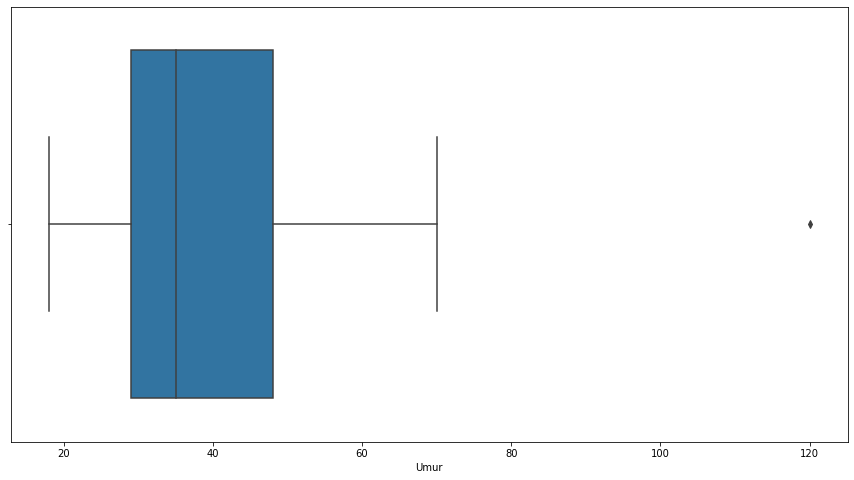

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Umur')
plt.show()

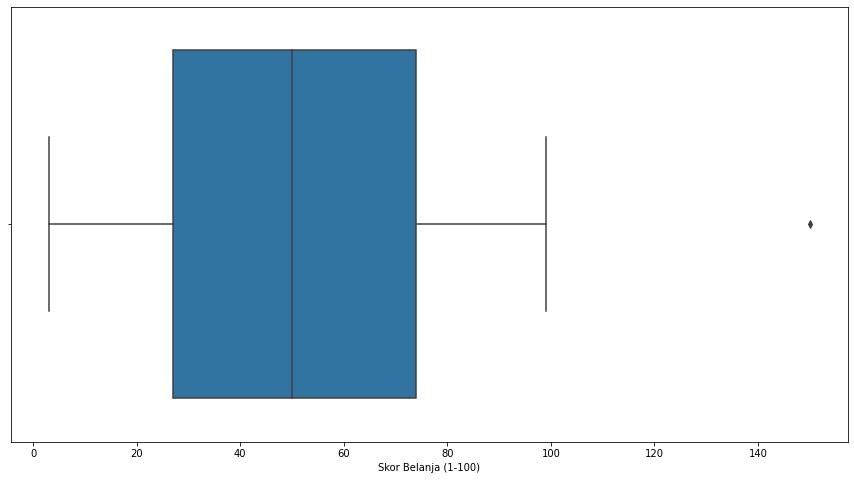

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Skor Belanja (1-100)')
plt.show()

In [21]:
def df_no_outlier(df):
    Q1 =df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    batas_bawah=Q1-(IQR*1.5)
    batas_atas=Q3+(IQR*1.5)
    df_akhir=df[(df>batas_bawah)&(df<batas_atas)]
    return df_akhir

In [28]:
df_clean = df_no_outlier(df[['Umur','Skor Belanja (1-100)']])
df_clean.dropna(axis=0, inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

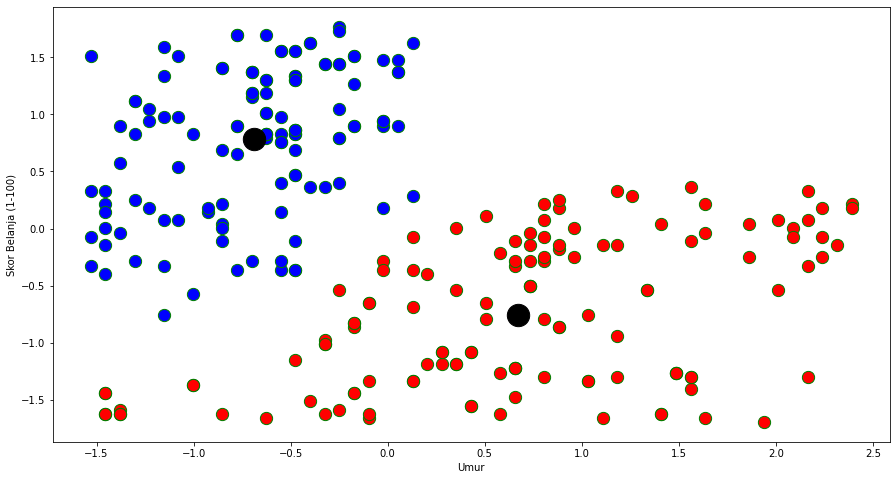

In [48]:
#Scaling dengan SSc
sc = StandardScaler()
df_std = sc.fit_transform(df_clean)
# clustering dengan KMeans
kmeans1 = KMeans (n_clusters=2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_

df_std_baru = pd.DataFrame(data=df_std, columns=['Skor Belanja (1-100)','Umur'])
df_std_baru['label_kmeans1']=labels1

plt.figure(figsize=(15,8))
plt.scatter(df_std_baru['Skor Belanja (1-100)'][df_std_baru.label_kmeans1==0],df_std_baru['Umur'][df_std_baru.label_kmeans1==0], c='blue', s=150, edgecolor='green', linestyle='-')
plt.scatter(df_std_baru['Skor Belanja (1-100)'][df_std_baru.label_kmeans1==1],df_std_baru['Umur'][df_std_baru.label_kmeans1==1], c='red', s=150, edgecolor='green', linestyle='-')

centers=kmeans1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black', s=500);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()



Text(0, 0.5, 'WCSS')

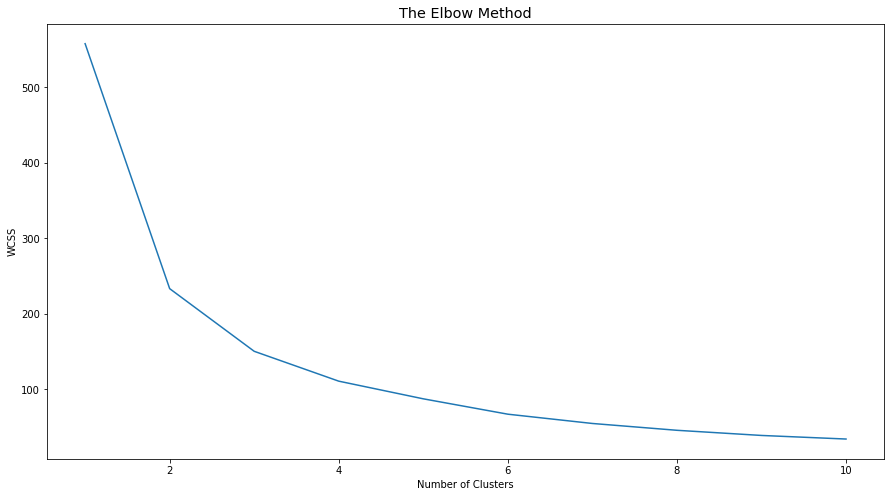

In [55]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state =42)
    kmeans.fit(df_std_baru)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss) 
plt.title('The Elbow Method', size='x-large')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')


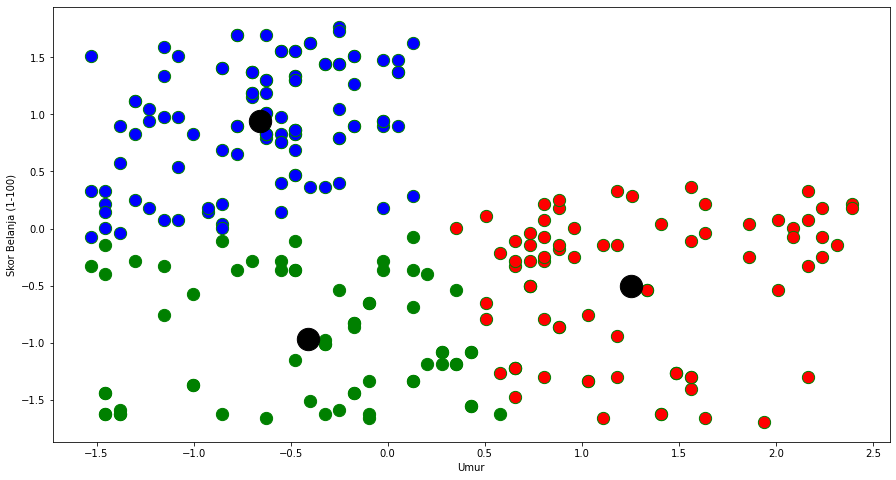

In [65]:
# clustering dengan KMeans K=3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state =42).fit(df_std)
labels2 = kmeans2.labels_

df_std_baru = pd.DataFrame(data=df_std, columns=['Skor Belanja (1-100)','Umur'])
df_std_baru['label_kmeans1']=labels1

plt.figure(figsize=(15,8))
plt.scatter(df_std_baru['Skor Belanja (1-100)'][df_std_baru.label_kmeans1==0],df_std_baru['Umur'][df_std_baru.label_kmeans1==0], c='green', s=150, edgecolor='green', linestyle='-')
plt.scatter(df_std_baru['Skor Belanja (1-100)'][df_std_baru.label_kmeans1==1],df_std_baru['Umur'][df_std_baru.label_kmeans1==1], c='red', s=150, edgecolor='green', linestyle='-')
plt.scatter(df_std_baru['Skor Belanja (1-100)'][df_std_baru.label_kmeans1==2],df_std_baru['Umur'][df_std_baru.label_kmeans1==2], c='blue', s=150, edgecolor='green', linestyle='-')

centers=kmeans1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black', s=500);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

In [66]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std_baru, labels=labels1))
print(silhouette_score(df_std_baru, labels=labels2))


0.5831289667416976
0.5831289667416976




---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

terdapat 3 segemen yaitu 
1. pelanggan 1 (biru): jenis pelanggan pertama ini ialah pelanggan berumur muda dengan skor belanja tinggi. Pelanggan ini adalah pelanggan dengan peghasilan tinggi. 
2. pelanggan 2 (hijau):jenis pelanggan kedua ini ialah pelanggan berumur muda dengan skor belanja rendah dan tergolong dengan penghasilan sedang.
3. pelanggan 3 (merah):jenis pelanggan kedua ini ialah pelanggan berumur tua dengan skor belanja rendah dan tergolong dengan penghasilan sedang.

sehingga dari data tersebut agar supermarket lebih maju maka harus bisa meluaskan segmentasi dimulai dari penghasilan sedang hingga tinggi. Karena dari segmentasi data diatas tidak bisa dipungkiri bahwa pelanggan banyak terdiri dari orang berpenghasilan sedang dengan umur muda sampai tua. 